In [1]:
from environment.models import simple_control, simple

import matplotlib.pyplot as plt
import numpy as np

In [2]:
env = simple_control.SimpleControlledEnv()

In [3]:
env.reset()

while not env.done:
    env.step()

QBER = env.get_QBER()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

AttributeError: 'SimpleControlledEnv' object has no attribute 'get_QBER'

In [ ]:
env = simple.SimpleEnv()

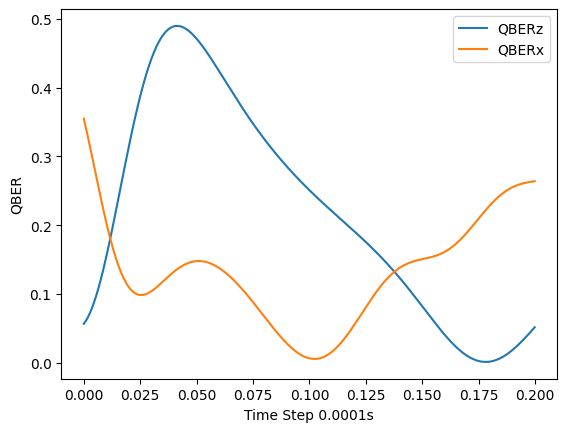

In [ ]:
env.simulate(reset=True)

QBER = env.get_QBER()
PHI = env.get_phi()
T = np.array(env.t_history)

plt.plot(env.t_history, QBER[:,0],label='QBERz')
plt.plot(env.t_history, QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

In [ ]:
import tensorflow as tf

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Prepare the input data
X = np.concatenate((QBER, T.reshape(-1,1)), axis=1)
y = PHI[:, 0]

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Make predictions
# predictions = model.predict(X)

# Print the predictions
# print(predictions)


Epoch 1/10
313/313 [==============================] - 1s 935us/step - loss: 0.3834
Epoch 2/10
313/313 [==============================] - 0s 850us/step - loss: 0.0578
Epoch 3/10
313/313 [==============================] - 0s 791us/step - loss: 0.0308
Epoch 4/10
313/313 [==============================] - 0s 805us/step - loss: 0.0196
Epoch 5/10
313/313 [==============================] - 0s 799us/step - loss: 0.0133
Epoch 6/10
313/313 [==============================] - 0s 828us/step - loss: 0.0098
Epoch 7/10
313/313 [==============================] - 0s 824us/step - loss: 0.0076
Epoch 8/10
313/313 [==============================] - 0s 803us/step - loss: 0.0058
Epoch 9/10
313/313 [==============================] - 0s 805us/step - loss: 0.0049
Epoch 10/10
313/313 [==============================] - 0s 803us/step - loss: 0.0039


In [ ]:
predictions = model.predict(X)

313/313 [==============================] - 0s 628us/step


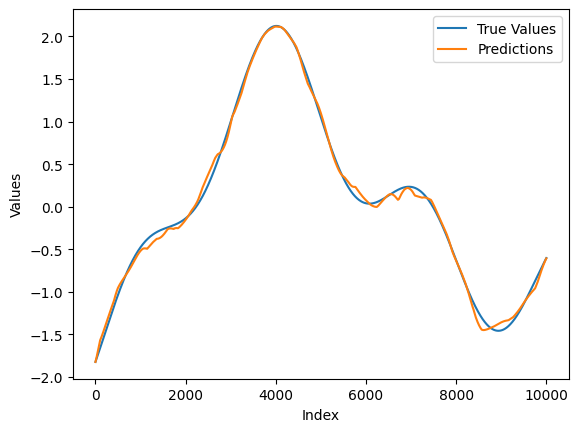

In [ ]:
plt.plot(y, label='True Values')
plt.plot(predictions, label='Predictions')
plt.legend(loc='upper right')
plt.ylabel('Values')
plt.xlabel('Index')
plt.show()

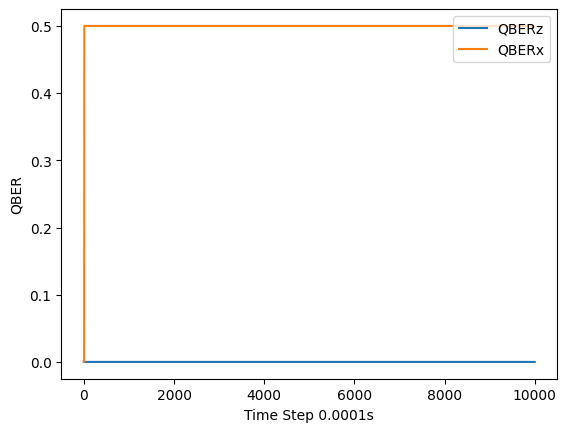

In [9]:
from environment.models import VariedControlledFixedEnv
import matplotlib.pyplot as plt

env = VariedControlledFixedEnv()
env.max_t = 1

env.fixed_errors_flags = [True, True, True, True,
                          True, True, True, True,
                          True, True, True, True]

env.reset()

while not env.done:
    env.step(np.zeros(4), [0.5*np.pi, 0, 0, 0], np.zeros(4))

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()